* ##### Assignment: 3.2 Using Data to improve ML
* ##### Name: Barath Anandaraman
* ##### Course: DSC630-T301
* ##### Week3: Data Preparation
* ##### Date: 03/15/2025

----

#### Load necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the AirBnB dataset, from source: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data

In [2]:
airbnb_df = pd.read_csv(r"Airbnb_Open_Data.csv", encoding="utf-8", low_memory = False)
airbnb_df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


#### Check for columns and its datatype

In [3]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

#### Check for some dataset NAs, uniqueness

In [4]:
df_state = []
columns = airbnb_df.columns 
for i in columns : 
    types = airbnb_df[i].dtypes
    unique_value = airbnb_df[i].nunique()         
    nan_value= airbnb_df[i].isnull().sum() 
    value_count= airbnb_df[i].isnull().count() 
    nan_percentage= round(nan_value/value_count*100,2)
    duplicated= airbnb_df.duplicated().sum()   
    
    df_state.append ([i , types , unique_value , nan_value, nan_percentage,duplicated])
        
df_state = pd.DataFrame(df_state)
df_state.columns =['Name of column' , 'Types' ,'Unique_data' , 'NAN value', "NAN_percentage","Duplicated"]
df_state.style.highlight_max(color = 'orange', axis = 0)

,Name of column,Types,Unique_data,NAN value,NAN_percentage,Duplicated
0,id,int64,102058,0,0.000000,541
1,NAME,object,61281,250,0.240000,541
2,host id,int64,102057,0,0.000000,541
3,host_identity_verified,object,2,289,0.280000,541
4,host name,object,13190,406,0.400000,541
5,neighbourhood group,object,7,29,0.030000,541
6,neighbourhood,object,224,16,0.020000,541
7,lat,float64,21991,8,0.010000,541
8,long,float64,17774,8,0.010000,541
9,country,object,1,532,0.520000,541


#### Perform basic data cleanup

In [5]:
# Remove $ and comma from columns with prices
col_to_clean=['price','service fee']
for col in col_to_clean:
    airbnb_df[col] = airbnb_df[col].str.replace('$', '', regex=False)  # Remove dollar sign
    airbnb_df[col] = airbnb_df[col].str.replace(',', '', regex=False)  # Remove commas
    airbnb_df[col] = airbnb_df[col].astype(float)

In [6]:
# Drop duplicates
airbnb_df = airbnb_df.drop_duplicates()

In [7]:
# Drop columns not needed
columns_to_drop = ['id', 'host id', 'NAME', 'host name', 'lat', 'long', 'country', 'country code',
                  'last review', 'house_rules', 'license', 'reviews per month']

# Drop the columns
airbnb_df = airbnb_df.drop(columns=columns_to_drop)

In [8]:
# Standardize data
label_encoder = LabelEncoder()

# Convert each object column to numeric using LabelEncoder
for column in airbnb_df.select_dtypes(include=['object','bool']).columns:
    airbnb_df[column] = label_encoder.fit_transform(airbnb_df[column])

In [9]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102058 non-null  int64  
 1   neighbourhood group             102058 non-null  int64  
 2   neighbourhood                   102058 non-null  int64  
 3   instant_bookable                102058 non-null  int64  
 4   cancellation_policy             102058 non-null  int64  
 5   room type                       102058 non-null  int64  
 6   Construction year               101844 non-null  float64
 7   price                           101811 non-null  float64
 8   service fee                     101785 non-null  float64
 9   minimum nights                  101658 non-null  float64
 10  number of reviews               101875 non-null  float64
 11  review rate number              101739 non-null  float64
 12  calculated host listi

In [10]:
airbnb_df.describe()

,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
count,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,101844.000000,101811.000000,101785.000000,101658.000000,101875.000000,101739.000000,101739.000000,101610.000000
mean,0.503665,1.688697,108.382645,0.499490,1.001862,0.973476,2012.488090,625.355580,125.039249,8.126640,27.517948,3.278733,7.936937,141.043992
std,0.505621,0.768401,69.539642,0.502056,0.817010,1.031060,5.765838,331.672649,66.325905,30.616698,49.571744,1.285089,32.266355,135.429156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,1.000000,1.000000,-10.000000
25%,0.000000,1.000000,52.000000,0.000000,0.000000,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2.000000,1.000000,3.000000
50%,1.000000,2.000000,97.000000,0.000000,1.000000,0.000000,2012.000000,625.000000,125.000000,3.000000,7.000000,3.000000,1.000000,96.000000
75%,1.000000,2.000000,178.000000,1.000000,2.000000,2.000000,2017.000000,913.000000,183.000000,5.000000,31.000000,4.000000,2.000000,268.000000
max,2.000000,7.000000,224.000000,2.000000,3.000000,3.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,5.000000,332.000000,3677.000000


---

#### Write a summary of your data and identify at least two questions to explore visually with your data

#### Assumptions on columns
1. price: The listing price per night.
2. number of reviews: The number of reviews the listing has received.
3. room type: The type of room (Entire home/apt, Private room, Shared room, and Hotel).
3. neighbourhood group: The general area or borough.
4. availability 365: The number of days the listing is available in a year.
5. bedrooms: number of bedrooms.
6. bathrooms: number of bathrooms.
#### Summary
1. The AirBnb dataset is taken from Kaggle source (https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data).
2. Initial dataset has 102,599 records with 26 columns. After performing basic cleanup it was 102058 rows and 14 columns.

#### Questions to explore the data set visually
1. Is there a correlation between the number of reviews and the availability of a listing?
2. How does the distribution of listing prices vary across different room types?

---

#### Create a histogram or bar graph from your data.

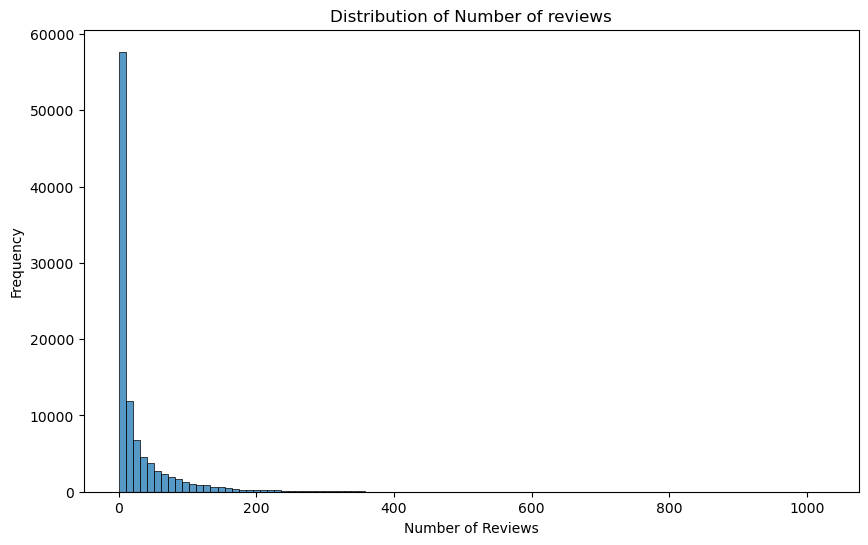

In [11]:
# Histogram of Number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df['number of reviews'], bins=100) #bins adjust the amount of bars in the graph.
plt.title('Distribution of Number of reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

####  Number of Reviews: The histogram of listing prices shows shows a right-skewed distribution, indicating that most are in the lower range, with a few very in very high reviews.

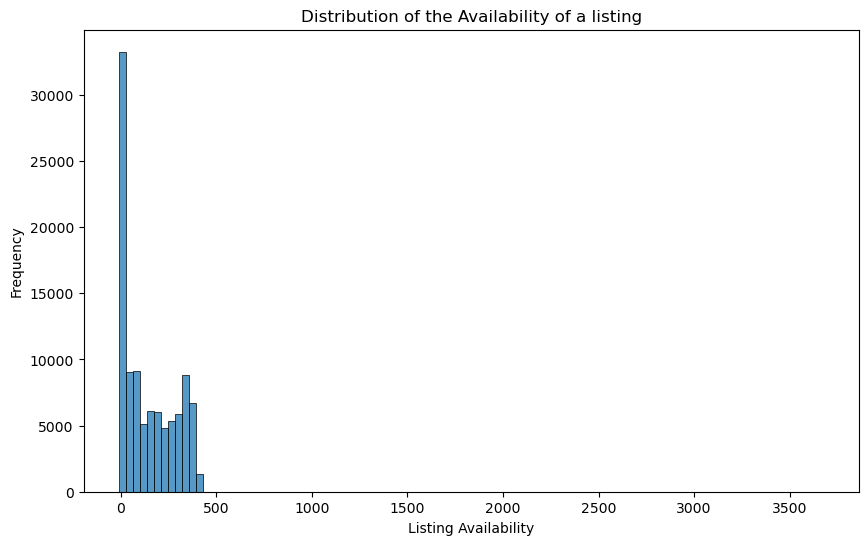

In [12]:
# Histogram of Availability of listing
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df['availability 365'], bins=100) #bins adjust the amount of bars in the graph.
plt.title('Distribution of the Availability of a listing')
plt.xlabel('Listing Availability')
plt.ylabel('Frequency')
plt.show()


#### Listing Availability: Histogram is right-skewed, but with short tail. The number of frequency of distribution is also less.

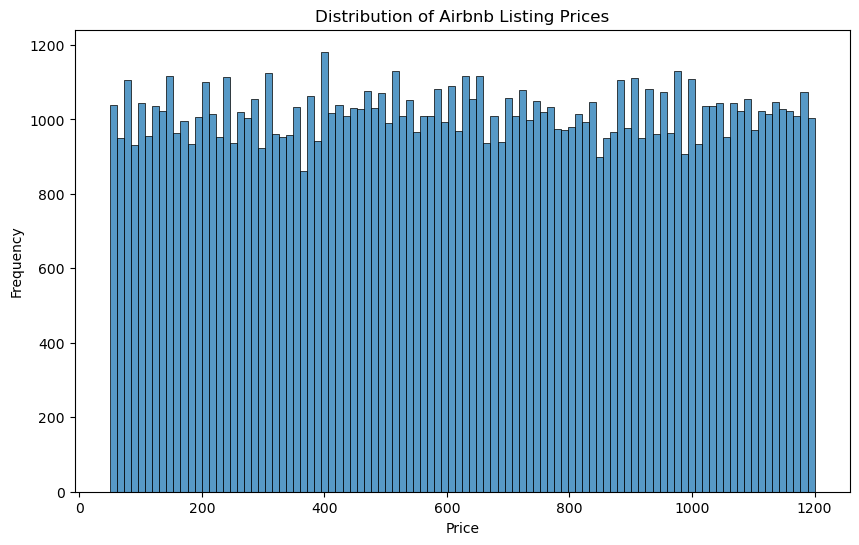

In [13]:
# Histogram of listing prices
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df['price'], bins=100) #bins adjust the amount of bars in the graph.
plt.title('Distribution of Airbnb Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#### Price Distribution: The histogram of listing prices shows a uniform distribution, indicating that most listings are in similar price range.

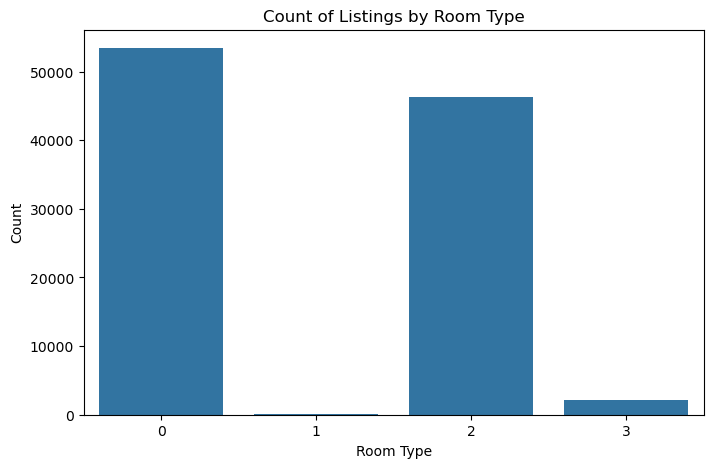

In [14]:
# Bar graph of room type counts
plt.figure(figsize=(8, 5))
sns.countplot(data=airbnb_df, x='room type')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


#### Room Type Distribution: The bar graph of room types reveals that "Entire home/apt" and "Shared room" are the most common listing types.

---

#### Create a boxplot from your data.

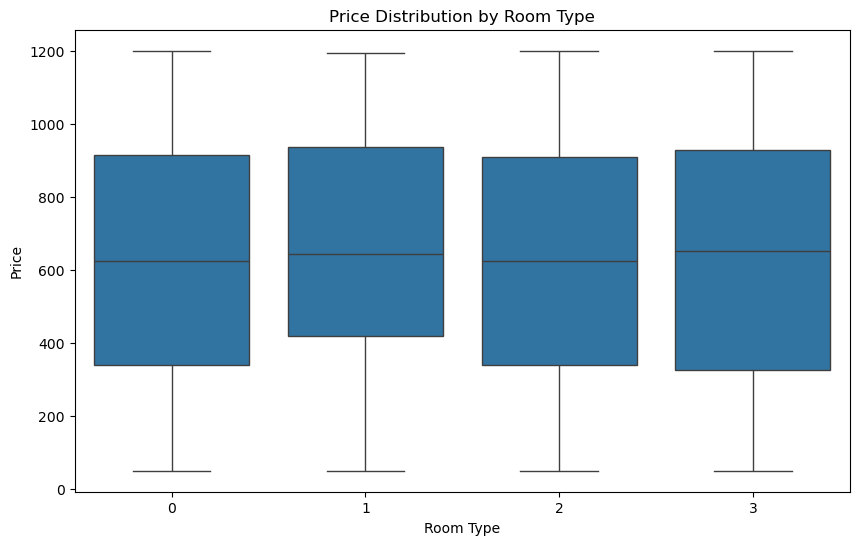

In [15]:
# Boxplot of prices by room type
plt.figure(figsize=(10, 6))
sns.boxplot(data=airbnb_df, x='room type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

#### Price by Room Type: The boxplot illustrates all Room Types listings generally have similar prices.

---

#### Create a bivariate plot from your data.

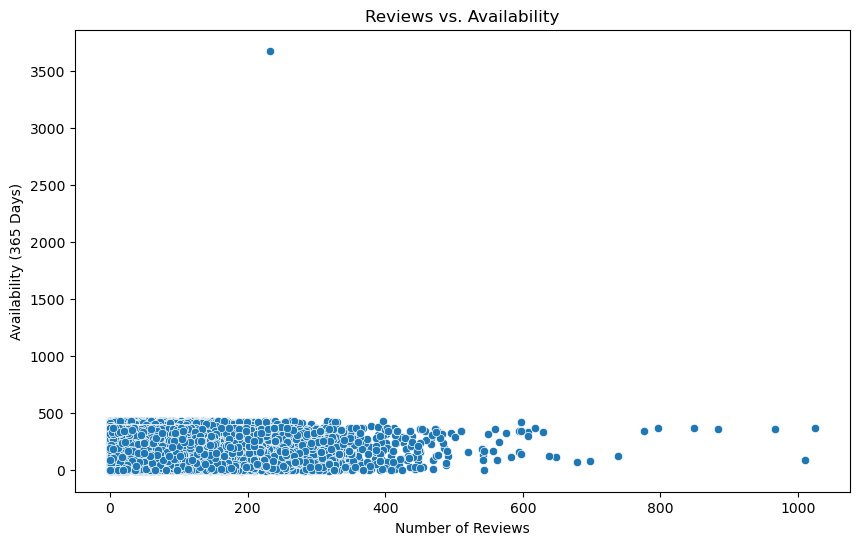

In [16]:
# Scatter plot of reviews vs. availability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airbnb_df, x='number of reviews', y='availability 365')
plt.title('Reviews vs. Availability')
plt.xlabel('Number of Reviews')
plt.ylabel('Availability (365 Days)')
plt.show()

#### Reviews vs. Availability: The scatter plot is concentrated towards low to medium number of reviews with low score on availability. There seems to be an outlier with number of reviews as well.

---

#### Create any additional visualizations that will help to answer the question(s) you want to answer.

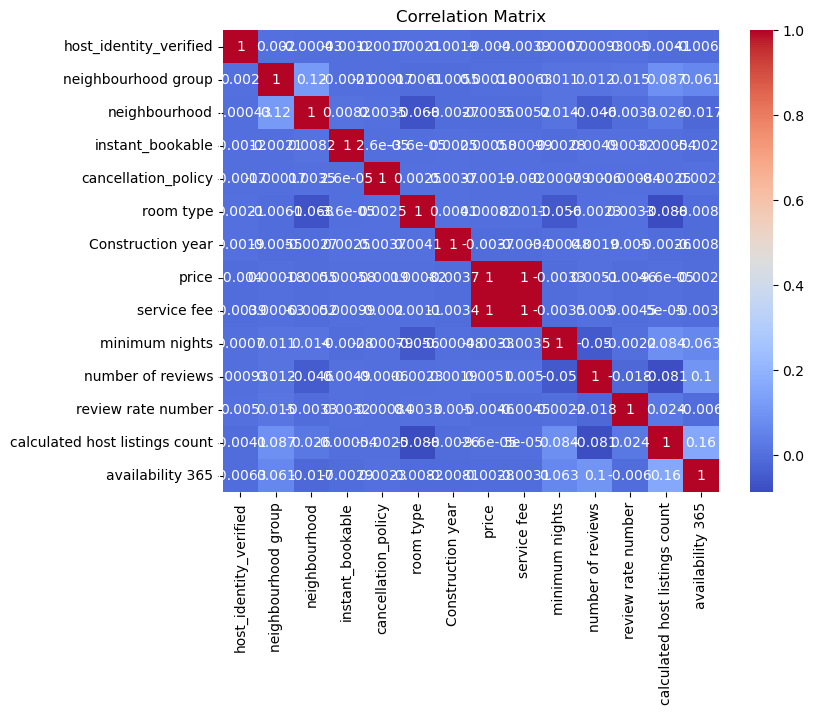

In [18]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = airbnb_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Correlation Matrix: The heatmap of the correlation matrix indicates that there is no strong linear correlation between most numerical variables. However strong correlation is between Price and Service Fee

##### Perform correlation matrix on the selected column

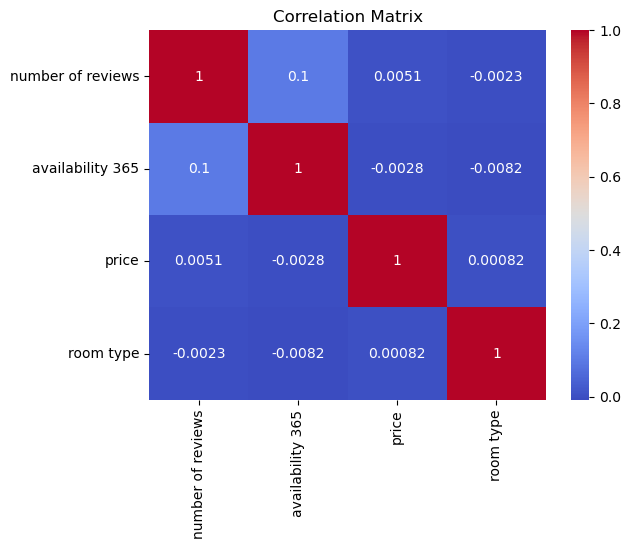

In [24]:
selected_columns = ['number of reviews', 'availability 365', 'price', 'room type']  
df_selected = airbnb_df[selected_columns]
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Correlation Matrix: The heatmap of the correlation matrix indicates a weak linear relation between 'Number of Reviews' and 'Availability 365'

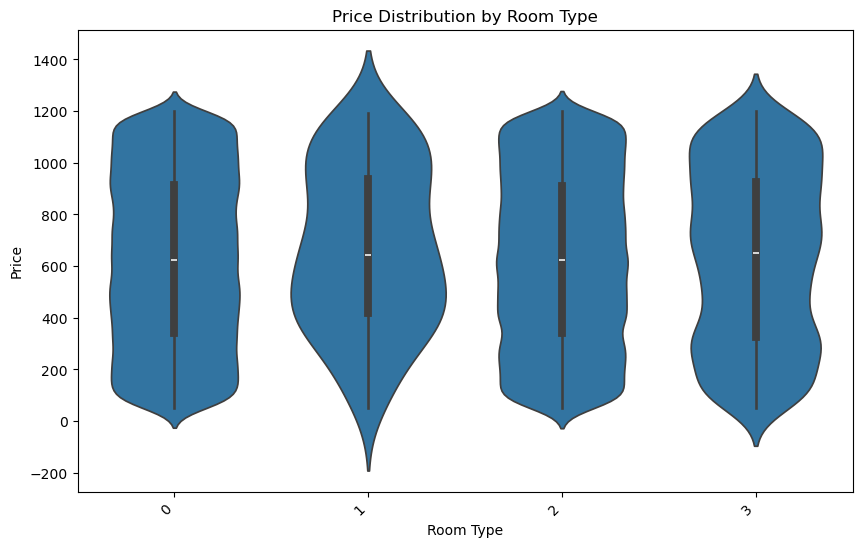

In [28]:
# Violin plot of Price by Room Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=airbnb_df, x='room type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

#### The violin plot shows that price distributions are uniform on Entire home/apt and Shared room, while Private room distribution looks normal.

---

#### Conclusion

##### Is there a correlation between the number of reviews and the availability of a listing?
1. Distribution of 'Number of Reviews' and 'Availability of listing' are both right skewed exhibiting similar behavior.
2. The scatter plot between them are concentrated towards low to medium number of reviews with low score on availability. There seems to be an outlier as well that can be analyzed further.
3. Correlation Matrix between 'Number of Reviews' and 'Availability of listing' is 0.1 indicating a weak linear relation.
##### Based on the above results of visualization there seems to be a weak linear relation but they are not conclusive and needs further analysis to support the theory.

##### How does the distribution of listing prices vary across different room types?
1. Distribution of 'listing Prices' is uniform, and based on bar chart the rental usage is higher on "Entire home/apt" and "Shared room"
2. Box plot on 'Price Distribution by Room Type' shows similar mean prices on all the types of Rooms.
3. The violin plot shows that price distributions are uniform on Entire home/apt and Shared room, while Private room distribution looks normal.
4. Correlation Matrix between 'Price' and 'Room Type' is 0.00082 indicating a very weak linear relation.
##### Based on the above results of visualization there seems to be a no relation but them, however based on violin plot the 'Private Room' distribution looks normal and 'Entire home/apt' and 'Shared room' are uniform and needs to be analyzed further